In [1]:
import pandas as pd
df=pd.read_csv("Final.csv")
print(df)

         CUSTOMER_ORDER_ID  SALES_ORG      DISTRIBUTION_CHANNEL      DIVISION  \
0                946851639       3537  United States of America  South-Region   
1                963432061       3449                Martinique  South-Region   
2                971991639       3238                   Moldova  South-Region   
3                754349803       3911      United Arab Emirates  South-Region   
4                930253442       2381                    Greece  South-Region   
...                    ...        ...                       ...           ...   
1101920          853605710       2498                   Germany  South-Region   
1101921          998890898       4509                   Armenia  South-Region   
1101922          983330221       3951                     Nepal  South-Region   
1101923          926668029       3235                    Panama  South-Region   
1101924          921701000       2968                 Nicaragua  South-Region   

        RELEASED_CREDIT_VAL

In [2]:
df.describe()

,CUSTOMER_ORDER_ID,SALES_ORG,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,SOLD_TO_PARTY,REQUESTED_DELIVERY_DATE,CREDIT_STATUS,CUSTOMER_NUMBER
count,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,219478.000000,1.101925e+06
mean,8.763187e+08,3.304891e+03,3.431364e+03,2.022032e+07,1.340316e+05,8.763265e+08,2.022035e+07,74.464771,1.074092e+09
std,7.088594e+07,6.958920e+02,5.483805e+02,1.426756e+02,6.503618e+04,7.090306e+07,1.751912e+03,14.444210,4.042693e+08
min,7.534520e+08,2.100000e+03,5.900000e+01,2.022010e+07,0.000000e+00,7.534518e+08,2.019081e+07,52.000000,1.210001e+07
25%,8.149522e+08,2.702000e+03,3.260000e+03,2.022021e+07,8.170200e+04,8.148366e+08,2.022022e+07,64.000000,1.230006e+09
50%,8.763963e+08,3.305000e+03,3.660000e+03,2.022032e+07,1.509540e+05,8.763542e+08,2.022033e+07,64.000000,1.230014e+09
75%,9.376832e+08,3.908000e+03,3.670000e+03,2.022042e+07,1.853580e+05,9.377293e+08,2.022050e+07,93.000000,1.230014e+09
max,9.990063e+08,4.510000e+03,4.260000e+03,2.022060e+07,2.359590e+05,9.990075e+08,2.202022e+07,93.000000,1.230025e+09


In [3]:
shape=df.shape
print("The numbers of row = ",shape[0])
print("The numbers of coloumn = ",shape[1])

The numbers of row =  1101925
The numbers of coloumn =  16


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101925 entries, 0 to 1101924
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CUSTOMER_ORDER_ID        1101925 non-null  int64  
 1   SALES_ORG                1101925 non-null  int64  
 2   DISTRIBUTION_CHANNEL     1101925 non-null  object 
 3   DIVISION                 1101925 non-null  object 
 4   RELEASED_CREDIT_VALUE    1101925 non-null  object 
 5   PURCHASE_ORDER_TYPE      1083233 non-null  object 
 6   COMPANY_CODE             1101925 non-null  int64  
 7   ORDER_CREATION_DATE      1101925 non-null  int64  
 8   ORDER_CREATION_TIME      1101925 non-null  int64  
 9   CREDIT_CONTROL_AREA      1101925 non-null  object 
 10  SOLD_TO_PARTY            1101925 non-null  int64  
 11  ORDER_AMOUNT             1101925 non-null  object 
 12  REQUESTED_DELIVERY_DATE  1101925 non-null  int64  
 13  ORDER_CURRENCY           1101925 non-null 

In [5]:
n=df.isnull().sum()
print("The number of null values are: ",n)

The number of null values are:  CUSTOMER_ORDER_ID               0
SALES_ORG                       0
DISTRIBUTION_CHANNEL            0
DIVISION                        0
RELEASED_CREDIT_VALUE           0
PURCHASE_ORDER_TYPE         18692
COMPANY_CODE                    0
ORDER_CREATION_DATE             0
ORDER_CREATION_TIME             0
CREDIT_CONTROL_AREA             0
SOLD_TO_PARTY                   0
ORDER_AMOUNT                    0
REQUESTED_DELIVERY_DATE         0
ORDER_CURRENCY                  0
CREDIT_STATUS              882447
CUSTOMER_NUMBER                 0
dtype: int64


In [6]:
import numpy as np
df["PURCHASE_ORDER_TYPE"]=df["PURCHASE_ORDER_TYPE"].fillna(np.nan)
df["CREDIT_STATUS"]=df["CREDIT_STATUS"].fillna(np.nan)

In [7]:
df["ORDER_CREATION_DATE"] = pd.to_datetime(df["ORDER_CREATION_DATE"], format="%Y%m%d")
print(df["ORDER_CREATION_DATE"])

0         2022-01-01
1         2022-01-01
2         2022-01-01
3         2022-01-01
4         2022-01-01
             ...    
1101920   2022-06-01
1101921   2022-06-01
1101922   2022-06-01
1101923   2022-06-01
1101924   2022-06-01
Name: ORDER_CREATION_DATE, Length: 1101925, dtype: datetime64[ns]


In [8]:
df["REQUESTED_DELIVERY_DATE"] = pd.to_datetime(df["REQUESTED_DELIVERY_DATE"], format="%Y%m%d")
print(df["REQUESTED_DELIVERY_DATE"])

0         2022-01-13
1         2022-01-11
2         2022-01-12
3         2022-01-06
4         2022-01-06
             ...    
1101920   2022-06-01
1101921   2022-06-01
1101922   2022-06-01
1101923   2022-06-01
1101924   2022-06-01
Name: REQUESTED_DELIVERY_DATE, Length: 1101925, dtype: datetime64[ns]


In [9]:
mask = df["ORDER_CREATION_DATE"] > df["REQUESTED_DELIVERY_DATE"]
count = mask.sum()
print("Number of records with order date greater than delivery date:", count)

Number of records with order date greater than delivery date: 27142


In [10]:
df=df[df["ORDER_CREATION_DATE"] <= df["REQUESTED_DELIVERY_DATE"]]
print(df)

         CUSTOMER_ORDER_ID  SALES_ORG      DISTRIBUTION_CHANNEL      DIVISION  \
0                946851639       3537  United States of America  South-Region   
1                963432061       3449                Martinique  South-Region   
2                971991639       3238                   Moldova  South-Region   
3                754349803       3911      United Arab Emirates  South-Region   
4                930253442       2381                    Greece  South-Region   
...                    ...        ...                       ...           ...   
1101920          853605710       2498                   Germany  South-Region   
1101921          998890898       4509                   Armenia  South-Region   
1101922          983330221       3951                     Nepal  South-Region   
1101923          926668029       3235                    Panama  South-Region   
1101924          921701000       2968                 Nicaragua  South-Region   

        RELEASED_CREDIT_VAL

In [11]:
count = df["ORDER_AMOUNT"].str.contains("-").sum()
print("The number of records with - is ", count)

The number of records with - is  32


In [12]:
df["ORDER_AMOUNT"] = df["ORDER_AMOUNT"].str.replace("-","")
print(df["ORDER_AMOUNT"])


0            954,61
1            787,36
2          67493,46
3           1405,54
4              0,00
             ...   
1101920     4415,19
1101921        0,00
1101922        0,00
1101923        0,00
1101924     4415,19
Name: ORDER_AMOUNT, Length: 1074783, dtype: object


In [13]:
count = df["ORDER_AMOUNT"].str.contains(",").sum()
print("The number of records with , is ", count)

The number of records with , is  1073406


In [14]:
df["ORDER_AMOUNT"] = df["ORDER_AMOUNT"].str.replace(",",".")
print(df["ORDER_AMOUNT"])

0            954.61
1            787.36
2          67493.46
3           1405.54
4              0.00
             ...   
1101920     4415.19
1101921        0.00
1101922        0.00
1101923        0.00
1101924     4415.19
Name: ORDER_AMOUNT, Length: 1074783, dtype: object


In [15]:
sol = (df["ORDER_CREATION_DATE"].dt.date == df["REQUESTED_DELIVERY_DATE"].dt.date).sum()
print(sol)

100437


In [16]:
currency_counts = df["ORDER_CURRENCY"].value_counts()
print(currency_counts)

USD    622835
EUR    253196
AUD     64200
CAD     55065
GBP     22028
MYR     13946
PLN     11861
AED      7852
HKD      6198
CHF      5259
RON      4731
SGD      3909
CZK      2178
HU1      1377
NZD        79
BHD        32
SAR        14
QAR        12
KWD         7
SEK         4
Name: ORDER_CURRENCY, dtype: int64


In [17]:
conversion_rates = {
    'USD': 1.0,
    'EUR': 1.08,
    'AUD': 0.66,
    'CAD': 0.74,
    'GBP': 1.24,
    'MYR': 0.22,
    'PLN': 0.24,
    'AED': 0.27,
    'HKD': 0.13,
    'CHF': 1.11,
    'RON': 0.22,
    'SGD': 0.74,
    'CZK': 0.046,
    'HU1': 0.0028,
    'NZD': 0.61,
    'BHD': 2.65,
    'SAR': 0.27,
    'QAR': 0.27,
    'KWD': 3.25,
    'SEK': 0.094
}

df['amount_in_usd'] = df['ORDER_AMOUNT'].astype(float)* df['ORDER_CURRENCY'].map(conversion_rates)

        
print(df['amount_in_usd'])

0           1030.9788
1            850.3488
2          72892.9368
3           1517.9832
4              0.0000
              ...    
1101920     3267.2406
1101921        0.0000
1101922        0.0000
1101923        0.0000
1101924     3267.2406
Name: amount_in_usd, Length: 1074783, dtype: float64


In [18]:
zero_count = (df['amount_in_usd'] == 0).sum()
print("Count of '0' values in the 'amount_in_usd' column:", zero_count)

Count of '0' values in the 'amount_in_usd' column: 237821


In [19]:
df['unique_cust_id'] = df['CUSTOMER_NUMBER'].astype(str) + '_' + df['COMPANY_CODE'].astype(str)
print(df['unique_cust_id'])

0            12311807_3220
1            12311807_3220
2            12118758_3260
3          1210499770_3290
4          1210351400_3290
                ...       
1101920    1210331804_4260
1101921    1210331804_4260
1101922    1210331811_4260
1101923    1210331811_4260
1101924    1210331804_4260
Name: unique_cust_id, Length: 1074783, dtype: object


In [20]:
print(df.columns)

Index(['CUSTOMER_ORDER_ID', 'SALES_ORG', 'DISTRIBUTION_CHANNEL', 'DIVISION',
       'RELEASED_CREDIT_VALUE', 'PURCHASE_ORDER_TYPE', 'COMPANY_CODE',
       'ORDER_CREATION_DATE', 'ORDER_CREATION_TIME', 'CREDIT_CONTROL_AREA',
       'SOLD_TO_PARTY', 'ORDER_AMOUNT', 'REQUESTED_DELIVERY_DATE',
       'ORDER_CURRENCY', 'CREDIT_STATUS', 'CUSTOMER_NUMBER', 'amount_in_usd',
       'unique_cust_id'],
      dtype='object')



Milestone 2-
========


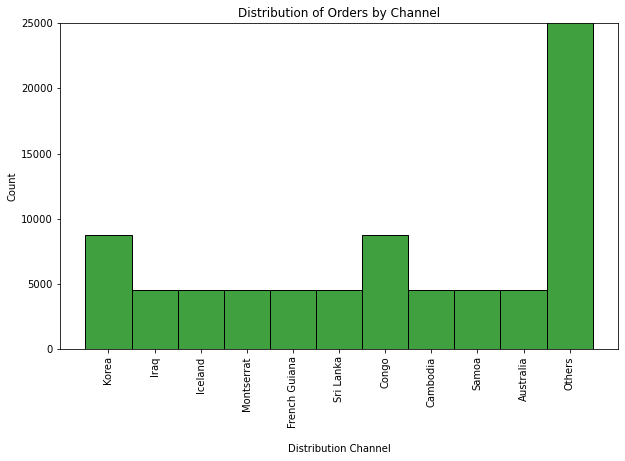

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

top_n = 10
channel_counts = df['DISTRIBUTION_CHANNEL'].value_counts()
top_channels = channel_counts.head(top_n)
other_channels = channel_counts.iloc[top_n:].sum()
filtered_df = df[df['DISTRIBUTION_CHANNEL'].isin(top_channels.index)]
other_channels_df = df[~df['DISTRIBUTION_CHANNEL'].isin(top_channels.index)].copy()
other_channels_df.loc[:, 'DISTRIBUTION_CHANNEL'] = 'Others'
filtered_df = pd.concat([filtered_df, other_channels_df])
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_df, x='DISTRIBUTION_CHANNEL', color='green', discrete=True)
plt.xlabel('\nDistribution Channel')
plt.ylabel('Count')
plt.title('Distribution of Orders by Channel')
plt.xticks(rotation=90)
plt.ylim(0, len(top_channels)*2500)
plt.show()

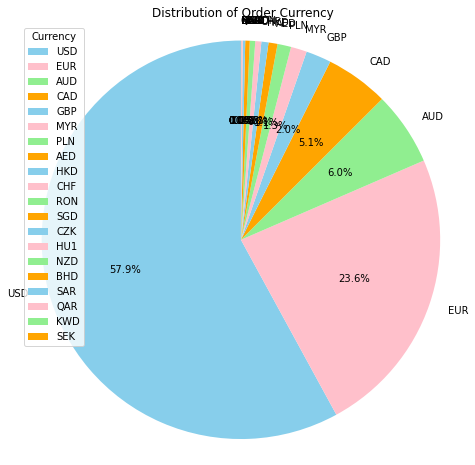

In [22]:
currency_counts = df["ORDER_CURRENCY"].value_counts()
plt.pie(currency_counts, labels=currency_counts.index, autopct="%1.1f%%", startangle=90, colors=["skyblue", "pink", "lightgreen", "orange"])
plt.title("Distribution of Order Currency")
plt.legend(title="Currency")
plt.axis("equal")
fig = plt.gcf()
fig.set_size_inches(8, 8)
plt.rcParams["font.size"] = 8
plt.show()

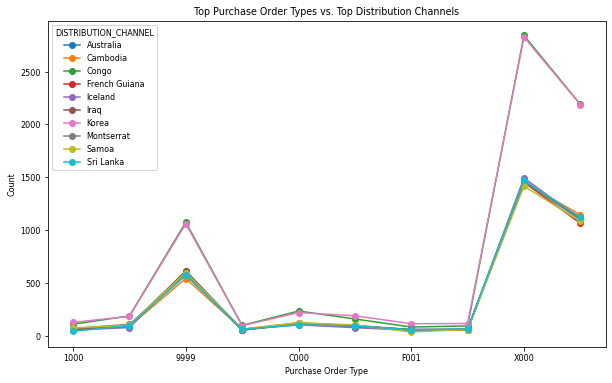

In [23]:
top_purchase_order_types = df['PURCHASE_ORDER_TYPE'].value_counts().head(10).index
top_distribution_channels = df['DISTRIBUTION_CHANNEL'].value_counts().head(10).index

df_filtered = df[df['PURCHASE_ORDER_TYPE'].isin(top_purchase_order_types) & df['DISTRIBUTION_CHANNEL'].isin(top_distribution_channels)]

grouped_data = df_filtered.groupby(['PURCHASE_ORDER_TYPE', 'DISTRIBUTION_CHANNEL']).size().reset_index(name='COUNT')

pivot_data = grouped_data.pivot(index='PURCHASE_ORDER_TYPE', columns='DISTRIBUTION_CHANNEL', values='COUNT')

pivot_data.plot(kind='line', marker='o', figsize=(10, 6))

plt.xlabel('Purchase Order Type')
plt.ylabel('Count')
plt.title('Top Purchase Order Types vs. Top Distribution Channels')

plt.show()

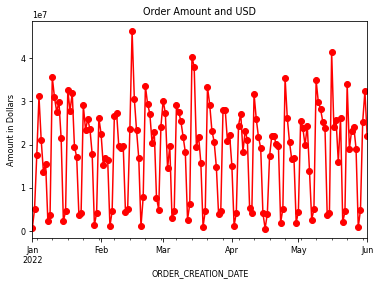

In [24]:
df['amount_in_usd'] = pd.to_numeric(df['amount_in_usd'], errors='coerce')
grouped_data = df.groupby('ORDER_CREATION_DATE')['amount_in_usd'].sum()
grouped_data.plot(kind='line', marker='o', color='red')
plt.ylabel('Amount in Dollars')
plt.xlabel('ORDER_CREATION_DATE')
plt.title('Order Amount and USD')
plt.show()











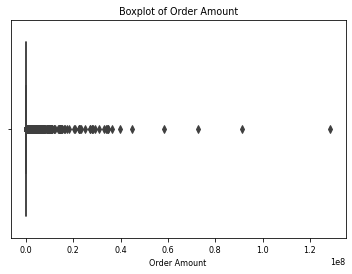

In [25]:
df['ORDER_AMOUNT'] = pd.to_numeric(df['ORDER_AMOUNT'], errors='coerce') 
sns.boxplot(x=df["ORDER_AMOUNT"]) 
plt.title("Boxplot of Order Amount") 
plt.xlabel("Order Amount") 
plt.show()


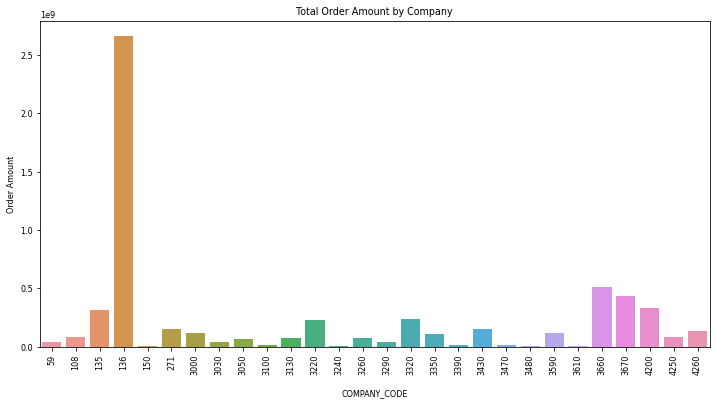

In [26]:

grouped_data = df.groupby('COMPANY_CODE')['ORDER_AMOUNT'].sum().reset_index()
sorted_data = grouped_data.sort_values('ORDER_AMOUNT', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='COMPANY_CODE', y='ORDER_AMOUNT', data=sorted_data)
plt.xlabel('\nCOMPANY_CODE')
plt.ylabel('Order Amount')
plt.title('Total Order Amount by Company')
plt.xticks(rotation='vertical')
plt.show()


Milestone-3 

Q1- Check for the outliers in the “amount_in_usd” column and replace the outliers with appropriate values, discussed in the sessions.

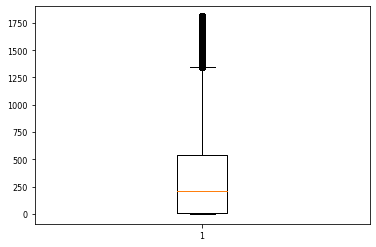

C:\Users\risha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\risha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\risha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

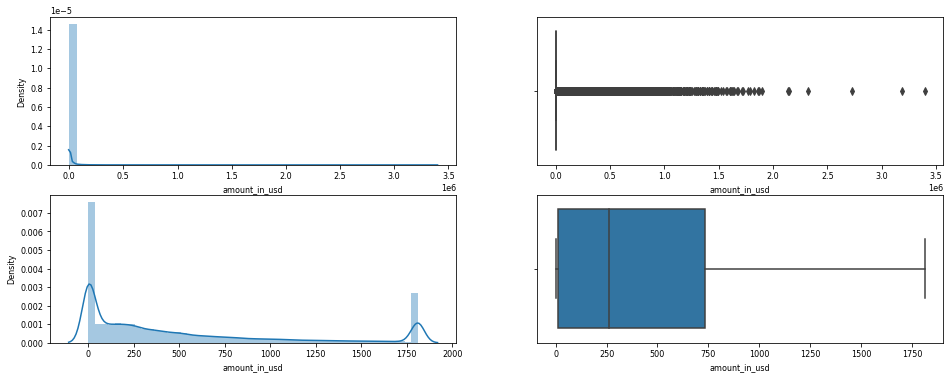

In [27]:
# we will be using IQR method to find and delete the outliers 


#finding the amount of outliers in amount_in_usd coloumn


import numpy as np
data = np.array(df['amount_in_usd'])
# assign your quartiles, limits and iq3
q1, q3 = np.percentile(data, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
#create conditions to isolate the outliers
outliers = data[(data < lower_bound) | (data > upper_bound)]
len(outliers)




# OBSERVATION
# 1.number of outliers is aprroximately 10% of the dataset 
# 2.we are going to delete the outliers


# Finding the upper limt and lower limt based on IQR 
percentile25 = df['amount_in_usd'].quantile(0.25)
percentile75 = df['amount_in_usd'].quantile(0.75)
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr


# triming and plotting the outliers

new_df = df[df['amount_in_usd'] < upper_limit]
new_df.shape
plt.boxplot(new_df['amount_in_usd'])
plt.show()



#capping the remaining outliers
new_df_cap = df.copy()
new_df_cap['amount_in_usd'] = np.where(
    new_df_cap['amount_in_usd'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['amount_in_usd'] < lower_limit,
        lower_limit,
        new_df_cap['amount_in_usd']))


#plotting before and after outlier removal
plt.figure(figsize=(16,6))
plt.subplot(2,2,1)
sns.distplot(df['amount_in_usd'])
plt.subplot(2,2,2)
sns.boxplot(df['amount_in_usd'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['amount_in_usd'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['amount_in_usd'])
plt.show()






Q2.Label encoding or One hot Encoding on all the categorical columns.

In [28]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['DISTRIBUTION_CHANNEL', 'DIVISION', 'PURCHASE_ORDER_TYPE', 'CREDIT_CONTROL_AREA', 'ORDER_CURRENCY']

label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

print(df.head(3))



   CUSTOMER_ORDER_ID  SALES_ORG  DISTRIBUTION_CHANNEL  DIVISION  \
0          946851639       3537                   232         1   
1          963432061       3449                   135         1   
2          971991639       3238                   141         1   

  RELEASED_CREDIT_VALUE  PURCHASE_ORDER_TYPE  COMPANY_CODE  \
0                  0,00                    0          3220   
1                  0,00                    0          3220   
2              82342,02                  204          3260   

  ORDER_CREATION_DATE  ORDER_CREATION_TIME  CREDIT_CONTROL_AREA  \
0          2022-01-01                43012                    5   
1          2022-01-01                43114                    2   
2          2022-01-01               110019                    0   

   SOLD_TO_PARTY  ORDER_AMOUNT REQUESTED_DELIVERY_DATE  ORDER_CURRENCY  \
0      756141537        954.61              2022-01-13               6   
1      798847812        787.36              2022-01-11           

Q3-Log Transformations on continuous columns 

In [29]:

continuous_columns = ['DISTRIBUTION_CHANNEL', 'PURCHASE_ORDER_TYPE', 'CREDIT_STATUS']

# Check if selected columns have zero or negative values
for column in continuous_columns:
    if (df[column] <= 0).any():
        print(f"Column {column} contains zero or negative values.")

# Apply log transformation
for column in continuous_columns:
    if (df[column] > 0).all():
        df[column] = np.log1p(df[column])

print(df.head(3))

Column DISTRIBUTION_CHANNEL contains zero or negative values.
Column PURCHASE_ORDER_TYPE contains zero or negative values.
   CUSTOMER_ORDER_ID  SALES_ORG  DISTRIBUTION_CHANNEL  DIVISION  \
0          946851639       3537                   232         1   
1          963432061       3449                   135         1   
2          971991639       3238                   141         1   

  RELEASED_CREDIT_VALUE  PURCHASE_ORDER_TYPE  COMPANY_CODE  \
0                  0,00                    0          3220   
1                  0,00                    0          3220   
2              82342,02                  204          3260   

  ORDER_CREATION_DATE  ORDER_CREATION_TIME  CREDIT_CONTROL_AREA  \
0          2022-01-01                43012                    5   
1          2022-01-01                43114                    2   
2          2022-01-01               110019                    0   

   SOLD_TO_PARTY  ORDER_AMOUNT REQUESTED_DELIVERY_DATE  ORDER_CURRENCY  \
0      756141537

Q.4-Try to extract new features by grouping existing columns 

In [30]:
from datetime import date
import pandas as pd

# Calculate the number of days for delivery
df['No_of_Days_for_Delivery'] = (df['REQUESTED_DELIVERY_DATE'] - df['ORDER_CREATION_DATE']).dt.days

# Convert 'RELEASED_CREDIT_VALUE' and 'CREDIT_STATUS' to numeric types
df['RELEASED_CREDIT_VALUE'] = pd.to_numeric(df['RELEASED_CREDIT_VALUE'], errors='coerce')
df['CREDIT_STATUS'] = pd.to_numeric(df['CREDIT_STATUS'], errors='coerce')

# Fill missing values with the mean or any other strategy
df['RELEASED_CREDIT_VALUE'].fillna(df['RELEASED_CREDIT_VALUE'].mean(), inplace=True)
df['CREDIT_STATUS'].fillna(df['CREDIT_STATUS'].mean(), inplace=True)

# Calculate the 'released_credit' column
df['released_credit'] = df['RELEASED_CREDIT_VALUE'] / df['CREDIT_STATUS']

# Select the desired columns
selected_columns = df[['REQUESTED_DELIVERY_DATE', 'ORDER_CREATION_DATE', 'No_of_Days_for_Delivery', 'released_credit']]

print(selected_columns.head(3))


  REQUESTED_DELIVERY_DATE ORDER_CREATION_DATE  No_of_Days_for_Delivery  \
0              2022-01-13          2022-01-01                       12   
1              2022-01-11          2022-01-01                       10   
2              2022-01-12          2022-01-01                       11   

   released_credit  
0     27273.054866  
1     27273.054866  
2     21834.168209  


Q.5-Create a heatmap to find correlation between the columns

C:\Users\risha\AppData\Local\Temp\ipykernel_23600\209948702.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


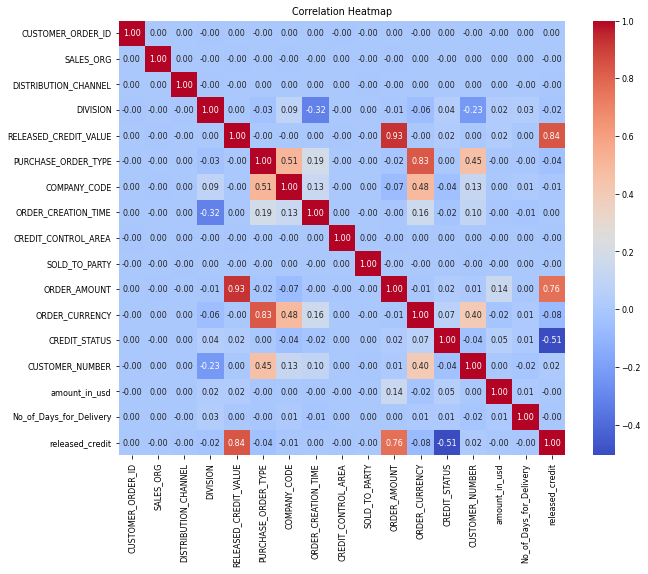

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


Q-6.Try to identify important or relevant columns for feature extraction

In [32]:
corr_matrix = df.corr().abs()
high_corr_var = np.where(corr_matrix > 0.7)
high_corr_var = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]
print(high_corr_var)

C:\Users\risha\AppData\Local\Temp\ipykernel_23600\2708442181.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()


[('RELEASED_CREDIT_VALUE', 'ORDER_AMOUNT'), ('RELEASED_CREDIT_VALUE', 'released_credit'), ('PURCHASE_ORDER_TYPE', 'ORDER_CURRENCY'), ('ORDER_AMOUNT', 'released_credit')]


MILESTONE 4

Q1-  Modify the dataset to pass into any type of machine learning models. 

In [33]:
# Log transformation on "amount_in_usd" column
df['amount_in_usd_log'] = np.log1p(df['amount_in_usd'])



In [39]:

column_names = df.columns

# Printing the column names
for column in column_names:
    print(column)


CUSTOMER_ORDER_ID
SALES_ORG
DISTRIBUTION_CHANNEL
DIVISION
RELEASED_CREDIT_VALUE
PURCHASE_ORDER_TYPE
COMPANY_CODE
ORDER_CREATION_DATE
ORDER_CREATION_TIME
CREDIT_CONTROL_AREA
SOLD_TO_PARTY
ORDER_AMOUNT
REQUESTED_DELIVERY_DATE
ORDER_CURRENCY
CREDIT_STATUS
CUSTOMER_NUMBER
amount_in_usd
unique_cust_id
No_of_Days_for_Delivery
released_credit
amount_in_usd_log


In [41]:
def difference_in_days(melt, lags, ffday, customer_id_col, create_date_col, net_amount_col):
    for i in range(ffday, lags+1):
        melt['Last-' + str(i) + 'day_Sales'] = melt.groupby([customer_id_col])[net_amount_col].shift(i)
    
    melt = melt.reset_index(drop=True)
    
    for i in range(ffday, lags+1):
        melt['Last-' + str(i) + 'day_Diff'] = melt.groupby([customer_id_col])['Last-' + str(i) + 'day_Sales'].diff()
    melt = melt.fillna(0)
    
    melt['days_to_deliver'] = (melt["REQUESTED_DELIVERY_DATE"] - melt["ORDER_CREATION_DATE"]).dt.days
    
    return melt


melt='df'
lags=7
ffday=1
customer_id_col= 'CUSTOMER_NUMBER'
create_date_col= 'ORDER_CREATION_DATE'
net_amount_col= 'ORDER_AMOUNT'

new_df = difference_in_days(df.copy(), lags, ffday, customer_id_col, create_date_col, net_amount_col)
new_df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,...,Last-6day_Sales,Last-7day_Sales,Last-1day_Diff,Last-2day_Diff,Last-3day_Diff,Last-4day_Diff,Last-5day_Diff,Last-6day_Diff,Last-7day_Diff,days_to_deliver
0,946851639,3537,232,1,2.030578e+06,0,3220,2022-01-01,43012,5,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12
1,963432061,3449,135,1,2.030578e+06,0,3220,2022-01-01,43114,2,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10
2,971991639,3238,141,1,2.030578e+06,204,3260,2022-01-01,110019,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11
3,754349803,3911,228,1,2.030578e+06,255,3290,2022-01-01,153013,5,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5
4,930253442,2381,82,1,2.030578e+06,255,3290,2022-01-01,160020,4,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074778,853605710,2498,79,1,2.030578e+06,350,4260,2022-06-01,74357,1,...,5916.96,13233.98,-17102.52,0.00,11978.53,-11537.57,12124.77,-7317.02,8166.38,0
1074779,998890898,4509,10,1,2.030578e+06,350,4260,2022-06-01,84052,3,...,18041.73,5916.96,3035.02,-17102.52,0.00,11978.53,-11537.57,12124.77,-7317.02,0
1074780,983330221,3951,151,1,2.030578e+06,350,4260,2022-06-01,85322,0,...,9378.29,31106.71,49887.02,4111.16,-2774.77,-7339.71,9594.09,-21728.42,20465.03,0
1074781,926668029,3235,167,1,2.030578e+06,350,4260,2022-06-01,90538,7,...,18972.38,9378.29,-62856.08,49887.02,4111.16,-2774.77,-7339.71,9594.09,-21728.42,0


In [45]:

column_names = new_df.columns

# Printing the column names
for column in column_names:
    print(column)

CUSTOMER_ORDER_ID
SALES_ORG
DISTRIBUTION_CHANNEL
DIVISION
RELEASED_CREDIT_VALUE
PURCHASE_ORDER_TYPE
COMPANY_CODE
ORDER_CREATION_DATE
ORDER_CREATION_TIME
CREDIT_CONTROL_AREA
SOLD_TO_PARTY
ORDER_AMOUNT
REQUESTED_DELIVERY_DATE
ORDER_CURRENCY
CREDIT_STATUS
CUSTOMER_NUMBER
amount_in_usd
unique_cust_id
No_of_Days_for_Delivery
released_credit
amount_in_usd_log
Last-1day_Sales
Last-2day_Sales
Last-3day_Sales
Last-4day_Sales
Last-5day_Sales
Last-6day_Sales
Last-7day_Sales
Last-1day_Diff
Last-2day_Diff
Last-3day_Diff
Last-4day_Diff
Last-5day_Diff
Last-6day_Diff
Last-7day_Diff
days_to_deliver


In [49]:
df_Sorted = new_df.sort_values(by=['ORDER_CREATION_DATE','ORDER_CREATION_TIME'])
df_Sorted

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,...,Last-6day_Sales,Last-7day_Sales,Last-1day_Diff,Last-2day_Diff,Last-3day_Diff,Last-4day_Diff,Last-5day_Diff,Last-6day_Diff,Last-7day_Diff,days_to_deliver
309493,783626976,4080,18,0,2.030578e+06,154,3590,2022-01-01,16,2,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16
309494,904677515,2414,194,1,2.030578e+06,343,3670,2022-01-01,3908,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12
309495,821300169,2971,45,0,2.030578e+06,342,3660,2022-01-01,40020,6,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10
309496,945898381,3500,225,0,2.030578e+06,342,3660,2022-01-01,40312,4,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10
0,946851639,3537,232,1,2.030578e+06,0,3220,2022-01-01,43012,5,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309422,984324653,3824,188,0,2.030578e+06,3,3350,2022-06-01,233008,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,13
309421,907330235,3588,216,0,2.030578e+06,104,3320,2022-06-01,233026,5,...,35700.00,863.75,0.00,5100.00,-17850.00,-3825.00,-11475.00,34836.25,-35769.85,5
309424,792696599,2660,124,0,2.030578e+06,104,150,2022-06-01,233352,1,...,704.07,628.29,-342.07,-803.42,1475.22,-846.13,680.27,75.78,-220.19,6
309425,958261571,2448,8,0,2.030578e+06,104,150,2022-06-01,233716,0,...,1384.34,704.07,128.64,-342.07,-803.42,1475.22,-846.13,680.27,75.78,6


In [53]:
df_for_training = df_Sorted.copy()
# Create a list of column names to be dropped
columns_to_drop = ['CUSTOMER_ORDER_ID', 'SALES_ORG', 'COMPANY_CODE','ORDER_CREATION_DATE',
                   'ORDER_CREATION_TIME','CREDIT_CONTROL_AREA','REQUESTED_DELIVERY_DATE','CUSTOMER_NUMBER',
                   'unique_cust_id','SOLD_TO_PARTY','amount_in_usd','ORDER_AMOUNT','RELEASED_CREDIT_VALUE'
                   ,'Last-1day_Diff','Last-2day_Diff','Last-3day_Diff',
                   'Last-4day_Diff','Last-5day_Diff','Last-6day_Diff','Last-7day_Diff','ORDER_CURRENCY','days_to_deliver']

# Use the drop function to remove the specified columns
df_for_training = df_for_training.drop(columns=columns_to_drop)

column_name = 'amount_in_usd_log'
df_for_training = df_for_training[[col for col in df_for_training.columns if col != column_name] + [column_name]]

df_for_training.head(3)

,DISTRIBUTION_CHANNEL,DIVISION,PURCHASE_ORDER_TYPE,CREDIT_STATUS,No_of_Days_for_Delivery,released_credit,Last-1day_Sales,Last-2day_Sales,Last-3day_Sales,Last-4day_Sales,Last-5day_Sales,Last-6day_Sales,Last-7day_Sales,amount_in_usd_log
309493,18,0,154,93.000000,16,21834.168209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.255360
309494,194,1,343,74.453619,12,27273.054866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
309495,45,0,342,74.453619,10,27273.054866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.099755


In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score,make_scorer
from sklearn.model_selection import cross_val_score

In [59]:
# Calculate the index position for splitting
split_index = int(0.8 * len(df_Sorted))
# Split the sorted dataframe into training and testing sets
train_df = df_for_training.iloc[:split_index]
test_df = df_for_training.iloc[split_index:]

# Split X and y
X_train = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:, -1].values

X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_linear = regressor.predict(X_test)

Decision Tree

In [62]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred_tree = regressor.predict(X_test)

Random Forest 

In [63]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0)
regressor.fit(X_train, y_train)
y_pred_random = regressor.predict(X_test)

Xg Boost

In [65]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [66]:
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(X_train,y_train)
y_pred_xgb = regressor.predict(X_test)


AdaBoost

In [69]:
from sklearn.ensemble import AdaBoostRegressor
# Create an AdaBoostRegressor model
ada_boost = AdaBoostRegressor(n_estimators=100)
# Train the model
ada_boost.fit(X_train, y_train)
y_pred_ada = regressor.predict(X_test)

Cat Boost

In [71]:
pip install catboost


Note: you may need to restart the kernel to use updated packages.


In [72]:
from catboost import CatBoostRegressor
regressor = CatBoostRegressor()
regressor.fit(X_train,y_train)
y_pred_cat = regressor.predict(X_test)

Learning rate set to 0.119074
0:	learn: 2.6587141	total: 192ms	remaining: 3m 11s
1:	learn: 2.4889359	total: 324ms	remaining: 2m 41s
2:	learn: 2.3459076	total: 456ms	remaining: 2m 31s
3:	learn: 2.2261971	total: 590ms	remaining: 2m 26s
4:	learn: 2.1274483	total: 736ms	remaining: 2m 26s
5:	learn: 2.0459493	total: 871ms	remaining: 2m 24s
6:	learn: 1.9764290	total: 997ms	remaining: 2m 21s
7:	learn: 1.9213827	total: 1.12s	remaining: 2m 18s
8:	learn: 1.8759493	total: 1.25s	remaining: 2m 17s
9:	learn: 1.8385468	total: 1.37s	remaining: 2m 15s
10:	learn: 1.8079619	total: 1.5s	remaining: 2m 14s
11:	learn: 1.7804355	total: 1.63s	remaining: 2m 14s
12:	learn: 1.7584724	total: 1.77s	remaining: 2m 14s
13:	learn: 1.7411131	total: 1.89s	remaining: 2m 13s
14:	learn: 1.7259350	total: 2.02s	remaining: 2m 12s
15:	learn: 1.7114075	total: 2.14s	remaining: 2m 11s
16:	learn: 1.6982490	total: 2.27s	remaining: 2m 11s
17:	learn: 1.6877864	total: 2.4s	remaining: 2m 11s
18:	learn: 1.6776884	total: 2.53s	remaining: 2

SVM

In [ ]:
from sklearn.svm import SVR

# Note: The following code may take a significant amount of time to run due to SVM's computational complexity

regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train)
y_pred_svr = regressor.predict(X_test)


4.Compare the accuracies of all the models 

In [73]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

# Define the list of model names and corresponding y_pred values
model_names = ['Linear Regression','Descision Tree','Random Forest', 'XGBoost','AdaBoost','CatBoost']
y_preds = [y_pred_linear,y_pred_tree,y_pred_random, y_pred_xgb,y_pred_ada,y_pred_cat]  # Replace with the actual y_pred values for each model

# Initialize an empty dictionary to store the evaluation metrics
eval_metrics = {
    'Model': [],
    'MSE': [],
    'MAE': [],
    'RMSE': [],
    'MedAE': [],
    'R-squared': []
}

# Iterate through each model
for model_name, y_pred in zip(model_names, y_preds):
    # Calculate the evaluation metrics for the current model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)


    # Format the metric values with four decimal places
    mse_formatted = "{:.4f}".format(mse)
    mae_formatted = "{:.4f}".format(mae)
    rmse_formatted = "{:.4f}".format(rmse)
    medae_formatted = "{:.4f}".format(medae)
    r2_formatted = "{:.4f}".format(r2)

    # Add the metrics to the eval_metrics dictionary
    eval_metrics['Model'].append(model_name)
    eval_metrics['MSE'].append(mse_formatted)
    eval_metrics['MAE'].append(mae_formatted)
    eval_metrics['RMSE'].append(rmse_formatted)
    eval_metrics['MedAE'].append(medae_formatted)
    eval_metrics['R-squared'].append(r2_formatted)

# Create a DataFrame from the eval_metrics dictionary
metrics_df = pd.DataFrame(eval_metrics)

# Display the metrics table
metrics_df

,Model,MSE,MAE,RMSE,MedAE,R-squared
0,Linear Regression,8.7612,2.3437,2.9599,1.8047,0.0001
1,Descision Tree,5.4250,1.3020,2.3292,0.6437,0.3809
2,Random Forest,2.8331,0.9756,1.6832,0.5345,0.6767
3,XGBoost,1.9284,0.8452,1.3887,0.4918,0.7799
4,AdaBoost,1.9284,0.8452,1.3887,0.4918,0.7799
5,CatBoost,1.9563,0.8559,1.3987,0.5107,0.7767


Q-5.Select the best possible model

In [74]:
# Sort the metrics DataFrame based on a specific evaluation metric, such as R-squared
sorted_metrics_df = metrics_df.sort_values(by='R-squared', ascending=False)

# Get the best model (the one with the highest R-squared)
best_model = sorted_metrics_df.iloc[0]

# Display the metrics for the best model
print("Best Model Metrics:")
print("-------------------")
print("Model:", best_model['Model'])
print("MSE:", best_model['MSE'])
print("MAE:", best_model['MAE'])
print("RMSE:", best_model['RMSE'])
print("MedAE:", best_model['MedAE'])
print("R-squared:", best_model['R-squared'])

Best Model Metrics:
-------------------
Model: XGBoost
MSE: 1.9284
MAE: 0.8452
RMSE: 1.3887
MedAE: 0.4918
R-squared: 0.7799


In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

parameters = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0.0, 0.1, 0.2],
    'subsample': [0.5,0.8, 1.0],
    'colsample_bytree': [0.5,0.8, 1.0],
}

xgb_regressor = xgb.XGBRegressor()

scoring = {
    'Negative MSE': 'neg_mean_squared_error',
    'R2 Score': make_scorer(r2_score)
}

grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=parameters, scoring=scoring, refit='R2 Score', cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_neg_mse = grid_search.best_score_
best_r2_score = grid_search.cv_results_['mean_test_R2 Score'][grid_search.best_index_]
best_params = grid_search.best_params_

print("Best Negative MSE: {:.2f}".format(best_neg_mse))
print("Best R2 Score: {:.2f}".format(best_r2_score))
print("Best Parameters: ", best_params)